#### __09. 비지도 학습__

__9.1 군집__

차원축소는 널리 사용되는 비지도 학습 방법 중 하나이다. <br>
비슷한 샘플을 그룹(클러스터)으로 할당하는 작업을 군집(clustering)이라고 한다. <br>
군집은 다음과 같은 애플리케이션에 사용된다.
- 고객 분류(추천 시스템)
- 데이터 분석
- 차원 축소 기법
- 이상치 탐지(부정거래 감지)
- 준지도 학습(레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 샘플에 레이블을 전파)
- 검색 엔진(제시된 이미지와 비슷한 이미지를 찾기)
- 이미지 분할(색을 기반으로 클러스터를 모음)

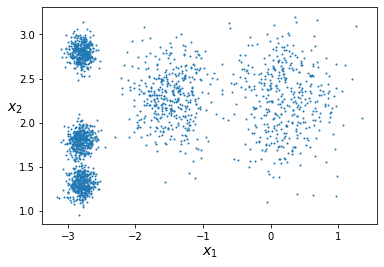

<Figure size 576x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs

# 2000개의 데이터 샘플 생성
# 5개의 센터를 중심으로 지정된 표준편차를 따르는 원 모양의 데이터 군집을 형성

blob_centers = np.array(
    [[0.2,  2.3],
     [-1.5,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, _ = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

# 산점도
plt.scatter(X[:, 0], X[:, 1], c=None, s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plt.show()

In [12]:
# k-평균
from sklearn.cluster import KMeans
k = 5  # 알고리즘이 찾을 클러스터의 개수
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [13]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [14]:
y_pred is kmeans.labels_

True

In [15]:
# 알고리즘이 찾은 센트로이드
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [16]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [17]:
# 샘플과 각 센트로으디 사이의 거리를 반환
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [36]:
# 센트로이드 초기화 방법
# 센트로이드의 위치를 근사하게 알 수 있다면 init 매개변수에 담아서 지정
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [37]:
# n_init 매개변수로 랜덤 초기화 횟수를 조절하고 최적의 솔루션 반환(이너셔 최소)
# 위의 코드에선 init으로 센트로이드를 초기화했으므로 n_init을 1로 지정
kmeans.fit(X)
kmeans.inertia_  # fit으로 훈련시켜야지 inertia_값을 볼 수 있음

211.59853725816836

In [40]:
# 스코어는 음수를 반환하는데, 예측기의 score()는 큰 값이 좋은 것이라는 규칙을 따르기 때문
kmeans.score(X)

-211.59853725816836

In [41]:
# 미니배치를 사용해 센트로이드를 조금씩 이동
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [44]:
# 실루엣 계수: 자신이 속한 클러스터에 얼마나 가까운지
# -1은 잘못된 클러스터에 할당, 0이면 클러스터 경계에 위치, 1이면 클러스터 내부에 속함
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)  # 실루엣 점수는 실루엣 계수의 평균

0.655517642572828

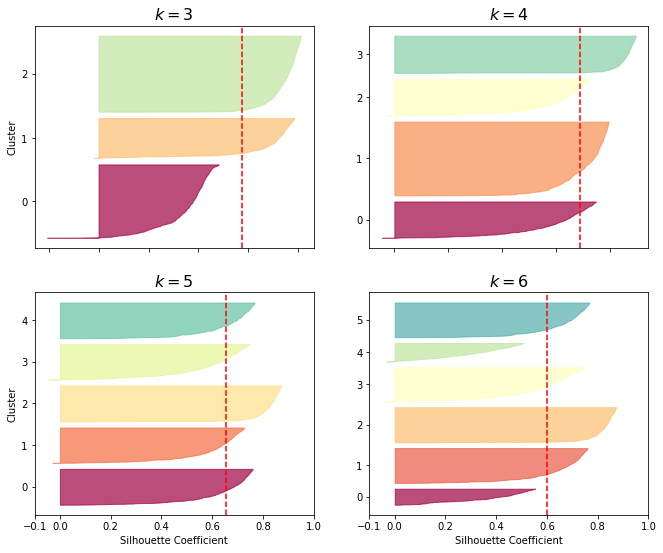

In [46]:
# 실루엣 다이어그램
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.show()

In [47]:
# 이미지 분할 - 색상 분할
import os
from matplotlib.image import imread  # from imageio import imread
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))
image.shape

(533, 800, 3)

In [50]:
# RGB 색상의 리스트로 변환 후 k-평균을 사용하여 색상을 클러스터로 모음
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

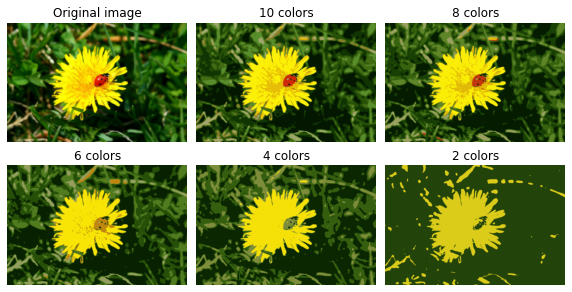

In [53]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)

for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

# 원본 이미지
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

# 색상 분할된 이미지 5개
for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [67]:
# 군집을 사용한 전처리
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits, y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9688888888888889

In [68]:
# cf 모델에 대한 이해
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
# X_train, y_train에 대해 훈련시킨 모델에 대해 X_test를 입력하여 클래스를 예측한다.
y_pred = log_reg.predict(X_test)  
# 이 때, X_test와 y_pred에 대한 score를 계산하면 1.0이 나올 수밖에 없다.
# 왜냐하면, 예측에 사용된 모델에서 나온 결과를 통해 score를 계산했기 때문이다.
# 따라서 테스트 세트에 대한 올바른 점수를 구하려면 .score(X_test, y_test)를 사용해야 한다.
log_reg.score(X_test, y_pred)

1.0

In [69]:
# 군집을 사용한 전처리 이어서
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

0.9777777777777777

In [74]:
pipeline.predict(X_test)

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 2, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [71]:
# 이 과정을 거치면 8*8의 흑백 이미지의 차원(64차원)이 50차원으로 감소하지만,
# 성능 향상은 대부분 변환된 데이터셋이 원본 데이터셋보다 선형적으로 더 잘 구분할 수 있기 때문이다.

# 교차 검증으로 k 값 찾기
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [72]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [73]:
grid_clf.score(X_test, y_test)

0.9777777777777777

In [124]:
# 군집을 사용한 준지도 학습
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test)

0.8333333333333334

In [125]:
# 훈련 세트를 50개의 클러스터로 모으고, 각 클러스터에서 센트로이드에 가장 가까운 이미지 찾기
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

representative_digit_idx = np.argmin(X_digits_dist, axis=0)  # 50개의 대표이미지 인덱스 확인
X_representative_digits = X_train[representative_digit_idx]  # 50개의 대표이미지 지정

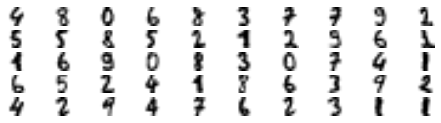

In [127]:
# 선정된 50개의 대표이미지
plt.figure(figsize=(8, 2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis("off")

plt.show()

In [128]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [129]:
y_representative_digits = y_train[representative_digit_idx]

In [130]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

In [132]:
# 레이블 전파
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [133]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)

0.9333333333333333

In [136]:
# 레이블 전파 2: 센트로이드와 가까운 20%에만 레이블을 전파해보고 어떻게 되는지 확인
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [137]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

log_reg.score(X_test, y_test)

0.94

In [140]:
# 레이블 전파 정확도
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846